In [4]:
import pandas as pd
import numpy as np

import datetime as dt
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Расширить рабочее поле ноутбука на весь экран
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
# Увеличить длинну отображаемых строк
pd.options.display.max_colwidth = 300

In [6]:
data = pd.DataFrame([
            ['16-10-2021', '23:56:10', 'A', 'a1', '0001', np.random.randint(100)], 
            ['16-10-2021', '23:58:30', 'A', 'a1', '0002', np.random.randint(100)],
            ['16-10-2021', '23:58:35', 'B', 'b1', '0003', np.random.randint(100)],
            ['16-10-2021', '23:58:56', 'B', 'b2', '0004', np.random.randint(100)],
            ['16-10-2021', '23:59:21', 'C', 'c1', '0005', np.random.randint(100)],
            ['16-10-2021', '23:59:42', 'C', 'c1', '0006', np.random.randint(100)],

            ['17-10-2021', '00:03:05', 'A', 'a1', '0007', np.random.randint(100)],
            ['17-10-2021', '00:03:25', 'A', 'a2', '0008', np.random.randint(100)],
            ['17-10-2021', '00:03:48', 'A', 'a3', '0009', np.random.randint(100)],
            ['17-10-2021', '00:05:24', 'B', 'b1', '0010', np.random.randint(100)],
            ['17-10-2021', '00:05:36', 'B', 'b1', '0011', np.random.randint(100)],
            ['17-10-2021', '00:05:44', 'B', 'b2', '0012', np.random.randint(100)],
            ['17-10-2021', '00:06:03', 'B', 'b2', '0013', np.random.randint(100)],
            ['17-10-2021', '03:12:13', 'B', 'b3', '0014', np.random.randint(100)],
            ['17-10-2021', '03:12:46', 'C', 'c1', '0015', np.random.randint(100)],
            ['17-10-2021', '13:06:54', 'C', 'c1', '0016', np.random.randint(100)], 
            ['17-10-2021', '13:12:10', 'C', 'c2', '0017', np.random.randint(100)], 
            ['17-10-2021', '19:48:30', 'C', 'c2', '0018', np.random.randint(100)], 

            ['18-10-2021', '00:06:05', 'C', 'c1', '0019', np.random.randint(100)], 
            ['18-10-2021', '03:08:03', 'C', 'c2', '0020', np.random.randint(100)],
            ['18-10-2021', '12:07:08', 'C', 'c3', '0021', np.random.randint(100)],
    
            ['19-10-2021', '00:04:03', 'A', 'a1', '0022', np.random.randint(100)], 
            ['19-10-2021', '02:08:20', 'A', 'a2', '0023', np.random.randint(100)],
            ['19-10-2021', '10:03:08', 'B', 'a2', '0024', np.random.randint(100)],
            ['19-10-2021', '12:07:08', 'B', 'b1', '0025', np.random.randint(100)],
    
], columns=['str_date', 'str_time','group', 'sub_group','val_id', 'value'])

data['datetime'] = data.apply(lambda row:  dt.datetime.strptime(f'{row.str_date} {row.str_time}', '%d-%m-%Y %H:%M:%S'), axis=1)

data['date'] = data.datetime.dt.date
data['time'] = data.datetime.dt.time
data['week'] = data.datetime.dt.isocalendar().week # Получить номер недели

# data['weekday'] = data.datetime.dt.strftime('%A') 
data['weekday'] = data.datetime.dt.day_name() # Получить день недели (на английском)

datetime_cols = ['datetime', 'date','time','week','weekday']
group_cols = ['group', 'sub_group']
data = data[[*datetime_cols, *group_cols, 'val_id', 'value']]

data.head()

,datetime,date,time,week,weekday,group,sub_group,val_id,value
0,2021-10-16 23:56:10,2021-10-16,23:56:10,41,Saturday,A,a1,0001,81
1,2021-10-16 23:58:30,2021-10-16,23:58:30,41,Saturday,A,a1,0002,52
2,2021-10-16 23:58:35,2021-10-16,23:58:35,41,Saturday,B,b1,0003,99
3,2021-10-16 23:58:56,2021-10-16,23:58:56,41,Saturday,B,b2,0004,39
4,2021-10-16 23:59:21,2021-10-16,23:59:21,41,Saturday,C,c1,0005,80


# Самый быстрый способ визуализировать данные

Есть два способа быстрого построения графиков:
1. Атрибут plot + графический метод
2. Графический метод plot() с указанием типа графика

## Гистограмма

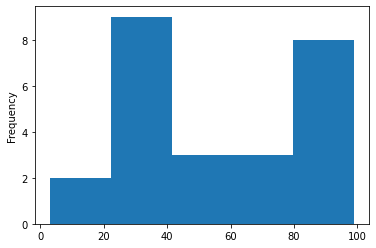

In [8]:
data.value.plot.hist(bins=5);

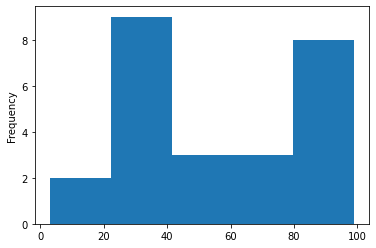

In [9]:
data.value.plot(kind='hist', bins=5);

### Плотность

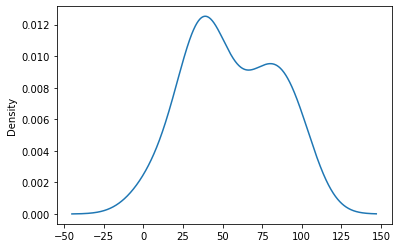

In [10]:
data.value.plot.density();

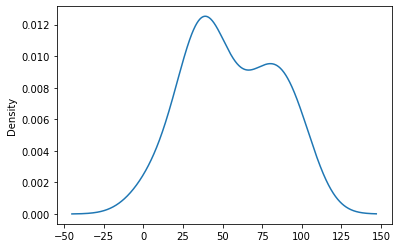

In [11]:
data.value.plot(kind='density');

### Линейный график

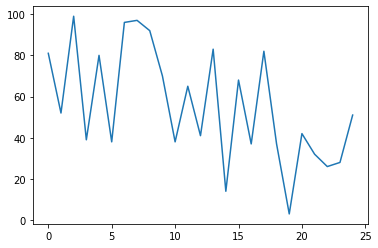

In [12]:
data.value.plot.line();

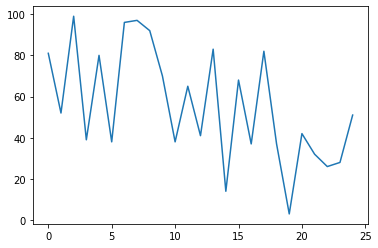

In [13]:
data.value.plot(kind='line');

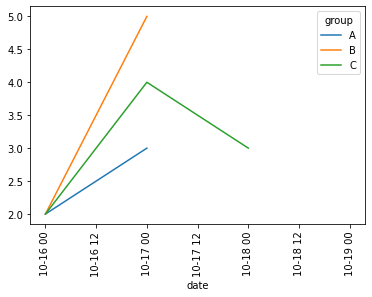

In [14]:
df = data.pivot_table(index='date', columns='group', values='val_id', aggfunc='nunique')

df.plot.line(rot=90);

### Круговая диаграмма

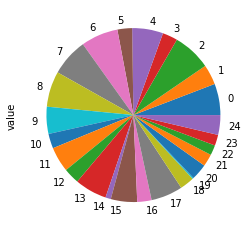

In [15]:
data.value.plot(kind='pie');

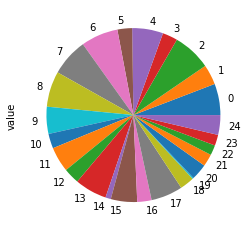

In [16]:
data.value.plot.pie();

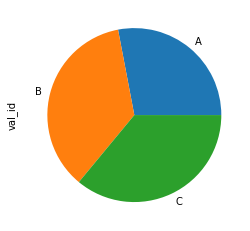

In [17]:
df = data.groupby('group')['val_id'].nunique()

df.plot.pie();

### Столбчатая диаграмма

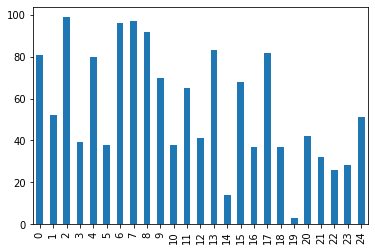

In [18]:
data.value.plot.bar();

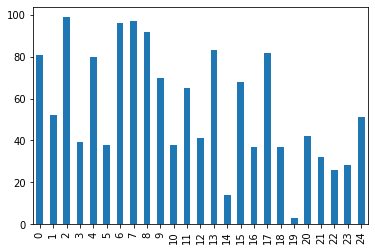

In [19]:
data.value.plot(kind='bar');

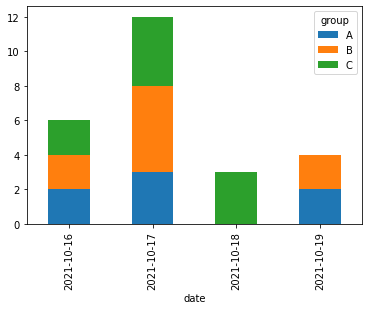

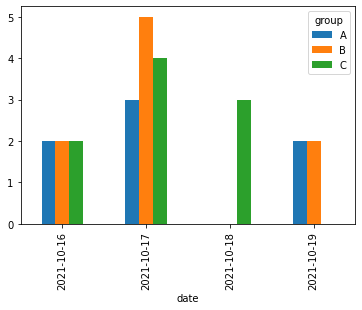

In [20]:
df = data.pivot_table(index='date', columns='group', values='val_id', aggfunc='nunique')
df.plot.bar(stacked=True);
df.plot.bar(stacked=False);

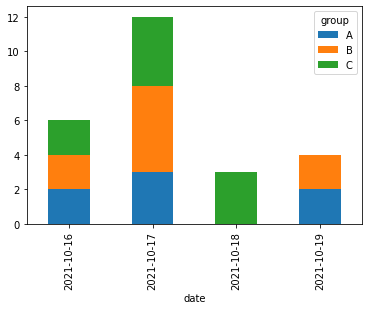

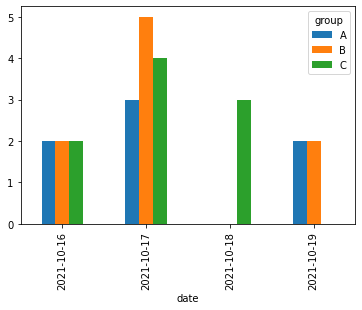

In [21]:
df = data.pivot_table(index='date', columns='group', values='val_id', aggfunc='nunique')
df.plot(kind='bar', stacked=True);
df.plot(kind='bar', stacked=False);

## Кастомные бины

In [22]:
bins = [-1, 0, 20, 40, 60, 80, 100, 1000]

labels = ['0', '0-20', '20-40', '40-60', '60-80', '80-100', '100+']

# С помощью функции pd.cut мы можно легко разделить ряд значений на нужные нам бины. 
custom_value_counts = pd.cut(data['value'], bins=bins, labels=labels).value_counts()
custom_value_counts.index = labels
          
custom_value_counts

0         8
0-20      7
20-40     4
40-60     4
60-80     2
80-100    0
100+      0
Name: value, dtype: int64

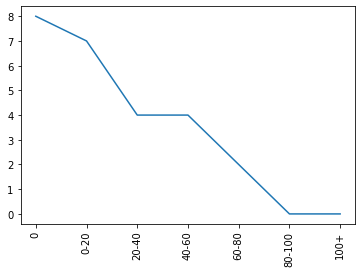

In [23]:
custom_value_counts.plot(rot=90, kind='line');

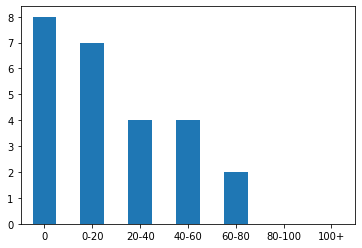

In [24]:
custom_value_counts.plot(rot=0, kind='bar');

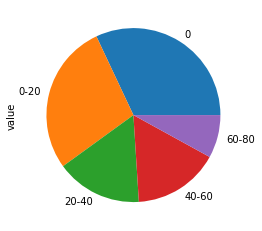

In [25]:
custom_value_counts.plot(rot=0, kind='pie');

# Комбинация графиков

In [26]:
n = 500

df = pd.DataFrame({
    'name': [],
    'val1': [],
    'val2': [],
    'val3': []
})

## Вывод нескольких графиков в одну фигуру

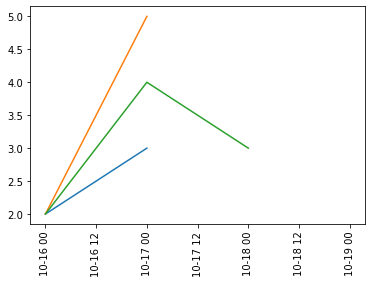

In [27]:
df = data.pivot_table(index='date', columns='group', values='val_id', aggfunc='nunique')

line_1 = df['A']
line_2 = df['B']
line_3 = df['C']

plt.plot(line_1)
plt.plot(line_2)
plt.plot(line_3)

plt.xticks(rotation=90);

## Вывод графиков в разные фигуры

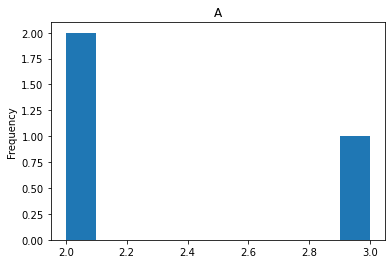

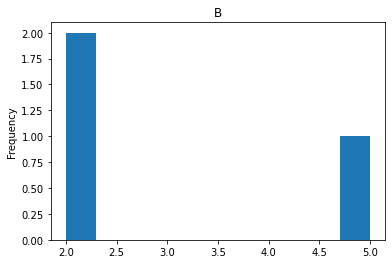

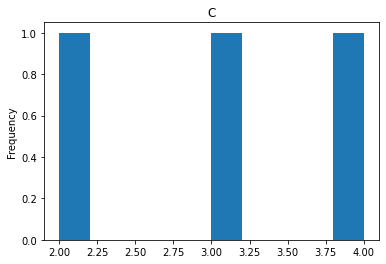

In [30]:
for col in df.columns:
    plt.figure()
    df[col].plot.hist()
    plt.title(col)

## Вывод нескольких subplot-ов

In [7]:
np.random.uniform(low=0, high=1, size=(d,))

array([0.66550535, 0.13243774, 0.36762819, ..., 0.95721343, 0.34336662,
       0.01753084])

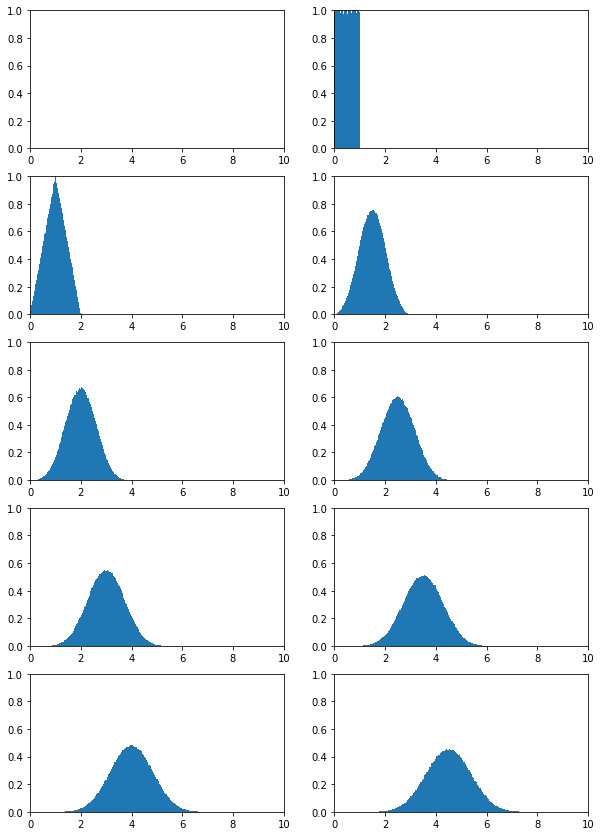

In [6]:
n = 10
d = 1_000_000

heights = np.array([0.0] * d)

plt.figure(figsize=(10, n * 3))
for i in range(n):
    plt.subplot(n, 2, i+1)
    plt.axis([0, n, 0, 1])
    plt.hist(heights, bins=150, density=True)
    heights += np.random.uniform(low=0, high=1, size=(d,))
plt.show()